# Introduction to SQL
    
In Week 1 you cleaned the data obtained from `lacity.org` that recorded details on traffic accidents.  You prepped this data to load it into a SQL database. But what we will see as we continue to analyze the data, is that there is more cleaning that needs to happen.
    
## Deliverables:
- Submit two files that has the name <span style='color:red'><b> YourLastName_Exercise_2: </span></b>
    1. Your **HTML** file that has your Source code and output
    2. Your **ipynb script** that has your Source code and output
    
## Objectives:
In this exercise you will use data cleaned from Week 1 of our class:
- Load data from csv file into a DataFrame Object
- Analyze the data using SQL and Python
- Use sqlalchemy to load data stored in a DataFrame object into SQLite database engine
- Use sqlalchemy to connect to SQLite database engine to execute SQL queries
- Execute different SQL queries


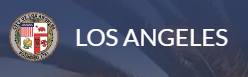

https://data.lacity.org/Public-Safety/Traffic-Collision-Data-from-2010-to-Present/d5tf-ez2w

### Structured Query Language (SQL) versus Python

The discussion board this week has you comparing the use of SQL to a general purpose language like Python.  What you will be able to test out this week in the homework is the mixing/matching of using SQL and Python to analyze data.

In [1]:
# load libraries
import pandas as pd
import numpy as np
# https://docs.sqlalchemy.org/en/13/intro.html
import sqlalchemy
from sqlalchemy import create_engine

import matplotlib.pyplot as plt
import seaborn as sns

# set up notebook to display multiple output in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# ------------------------------------------------------
# read in file from Week 1
# ------------------------------------------------------
df = pd.read_csv("Final Traffic.csv")

# check out fields
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549547 entries, 0 to 549546
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   DR_Number           549547 non-null  int64  
 1   Date                549547 non-null  object 
 2   Division            549547 non-null  object 
 3   Reporting_District  549547 non-null  int64  
 4   Age                 549547 non-null  int64  
 5   Gender              549547 non-null  object 
 6   Descent             549547 non-null  object 
 7   Year                549547 non-null  int64  
 8   Month               549547 non-null  int64  
 9   Day                 549547 non-null  int64  
 10  Hour                549547 non-null  int64  
 11  imputeAge           549547 non-null  bool   
 12  Latitude            549547 non-null  float64
 13  Longitude           549547 non-null  float64
dtypes: bool(1), float64(2), int64(7), object(4)
memory usage: 55.0+ MB


In [3]:
# look at the first 5 records
df.head()

,DR_Number,Date,Division,Reporting_District,Age,Gender,Descent,Year,Month,Day,Hour,imputeAge,Latitude,Longitude
0,190319651,08/24/2019,Southwest,356,22,Male,Hispanic,2019,8,24,4,False,34.0255,-118.3002
1,190319680,08/30/2019,Southwest,355,30,Female,Hispanic,2019,8,30,23,False,34.0256,-118.3089
2,190413769,08/25/2019,Hollenbeck,422,40,Male,Unknown,2019,8,25,5,True,34.0738,-118.2078
3,190127578,11/20/2019,Central,128,21,Male,Hispanic,2019,11,20,3,False,34.0492,-118.2391
4,190319695,08/30/2019,Southwest,374,49,Male,Black,2019,8,30,21,False,34.0108,-118.3182


### Load traffic data into a table in a SQLite database

- we are creating a database called `LAtraffic`
- we are creating a table called `traffic`


In [4]:
# 'engine' will be used to reference the database
engine = create_engine('sqlite:///LAtraffic.db')

df.to_sql('traffic', engine, if_exists = 'replace', index = False)
# check out columns in table
pd.read_sql_table('traffic', engine).columns

Index(['DR_Number', 'Date', 'Division', 'Reporting_District', 'Age', 'Gender',
       'Descent', 'Year', 'Month', 'Day', 'Hour', 'imputeAge', 'Latitude',
       'Longitude'],
      dtype='object')

### Next read in the MO file we created earlier in the class and add to the database

- we are creating a table in the `LAtraffic` database called `MO_accident`

In [5]:
# specify that the codes column is a string, not an int so we don't lose leading zeros
mo = pd.read_csv("MO per accident.csv",dtype = {'MO_Codes':'str'})

mo.to_sql('MO_accident', engine, if_exists = 'replace', index = False)
# check out columns in table
pd.read_sql_table('MO_accident', engine).columns

Index(['DR_Number', 'MO_Codes'], dtype='object')

### Now read in a file that contains all MO codes and a description of what they mean

- we are creating a table in the `LAtraffic` database called `MO_master`

In [6]:
# specify that the codes column is a string, not an int so we don't lose leading zeros
mo_mast = pd.read_csv("MO master.csv", dtype = {'Codes':'str'})

mo_mast.to_sql('MO_master', engine, if_exists = 'replace', index = False)
# check out the columns
pd.read_sql_table('MO_master', engine).columns

Index(['Codes', 'Description'], dtype='object')

### You can see the three tables that are now saved into the `LAtraffic` database

In [7]:
from sqlalchemy import schema
xMetaData = schema.MetaData(bind = engine)
xMetaData.reflect()
# will show table names
xMetaData.tables.keys()

dict_keys(['MO_accident', 'MO_master', 'traffic'])

### Simple query using * to select all columns

- Clean, easy-to-read code has main query commands each on a new line (SELECT and FROM on separate lines)
- SELECT specifies the columns in a table
- FROM specifies the table name
- engine refers to the database named in the create_engine cell

In [8]:
# using pandas read_sql_query returns a dataframe
q1 = pd.read_sql_query("SELECT * \
                        FROM MO_accident", engine)
q1.head(10)

,DR_Number,MO_Codes
0,190319651,3036
1,190319651,3004
2,190319651,3026
3,190319651,3101
4,190319651,4003
5,190319680,3037
6,190319680,3006
7,190319680,3028
8,190319680,3030
9,190319680,3039


In [9]:
# same query, but you can choose to have query string separate
qstring = "SELECT * \
           FROM MO_accident"
q1a = pd.read_sql_query(qstring, engine)
q1a.head()

,DR_Number,MO_Codes
0,190319651,3036
1,190319651,3004
2,190319651,3026
3,190319651,3101
4,190319651,4003


In [10]:
# can use three single quotes and then no need for \ for line continuation
query = '''SELECT * 
           FROM MO_accident'''
q1b = pd.read_sql_query(query, engine)
q1b.head()

,DR_Number,MO_Codes
0,190319651,3036
1,190319651,3004
2,190319651,3026
3,190319651,3101
4,190319651,4003


### Using SELECT for specific fields

- can individually pull out specific fields

In [11]:
q2 = pd.read_sql_query("SELECT Division, Gender, Age \
                        FROM traffic", engine)
q2.head(10)

,Division,Gender,Age
0,Southwest,Male,22
1,Southwest,Female,30
2,Hollenbeck,Male,40
3,Central,Male,21
4,Southwest,Male,49
5,Hollenbeck,Male,60
6,Harbor,Male,73
7,Southwest,Male,39
8,Southwest,Male,48
9,Hollenbeck,Male,68


### Can count and group the results

- `Count(*)` will count the rows that qualify
- `AS` allows you to rename the result to a more user friendly column name (in this example 'Accidents')
- `GROUP BY` is how the counts are accumulated - in this case by MO_Codes

**SQL Aggregate Functions**
- COUNT:  returns number of values in a specific column
- SUM: returns the sum of the values in a specific column
- AVG: returns the average of the values in a specific column
- MIN: returns the smallest value in a specific column
- MAX: returns the largest value in a specific column

In [12]:
# count of MO codes
q3 = pd.read_sql_query("SELECT MO_Codes, count(*) AS Accidents \
                        FROM MO_accident \
                        GROUP BY MO_Codes ", engine)
q3

,MO_Codes,Accidents
0,0100,5
1,0101,943
2,0102,21
3,0103,6
4,0104,7
...,...,...
325,4024,4753
326,4025,35028
327,4026,80404
328,4027,56145


### ORDER BY will determine the output order

In [13]:
# count of MO codes
q4 = pd.read_sql_query("SELECT MO_Codes, count(*) AS Count \
                        FROM MO_accident \
                        GROUP BY MO_Codes \
                        ORDER BY Count DESC", engine)
q4

,MO_Codes,Count
0,3101,402493
1,3701,327780
2,3401,327721
3,3004,242872
4,3037,212281
...,...,...
325,2100,1
326,2145,1
327,2150,1
328,2303,1


### Check out the MO_master table

In [14]:
# what is in the MO_master table?
query = "SELECT * \
         FROM MO_master"
q5 = pd.read_sql_query(query, engine)
q5.head(10)

,Codes,Description
0,0100,Suspect Impersonate
1,0101,Aid victim
2,0102,Blind
3,0103,Crippled
4,0104,Customer
5,0105,Delivery
6,0106,Doctor
7,0107,God
8,0108,Infirm
9,0109,Inspector


### Joining two tables using WHERE clause

- in the `WHERE` line below we are joining the **MO_accident** table with the **MO_master** table
- the two tables are being joined on the MO_Codes column of the MO_accident table and the Codes column of the MO_master table
- this type of join is called an Inner Join

<div>
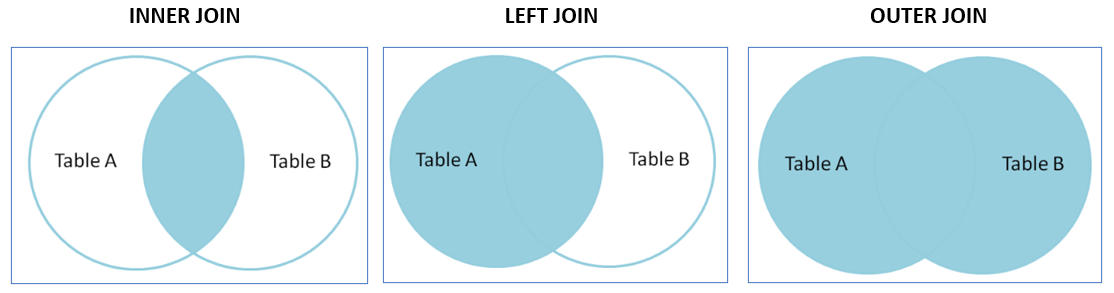
</div>


<div>
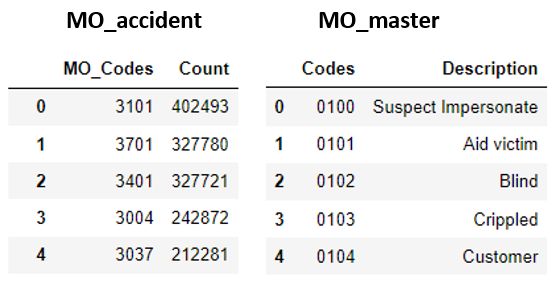
</div>


In [15]:
# look at MO codes with descriptions
q6 = pd.read_sql_query("SELECT MO_Codes, Description, count(*) AS Count \
                        FROM MO_accident a, MO_master m \
                        WHERE a.MO_Codes = m.Codes \
                        GROUP BY MO_Codes \
                        ORDER BY Count DESC", engine)
q6.head(20)

,MO_Codes,Description,Count
0,3101,T/C - PCF (A) In the Narrative,402493
1,3701,T/C - Movement Preceding Collision,327780
2,3401,T/C - Type of Collision,327721
3,3004,T/C - Veh vs Veh,242872
4,3037,T/C - At Intersection - No,212281
5,3030,T/C - Hit and Run Misd,184005
6,3028,T/C - (N) Non Injury,149323
7,3026,T/C - (C) Complaint of Injury,133923
8,3036,T/C - At Intersection - Yes,116366
9,3006,T/C - Veh vs Parked Veh,102339


### Using JOIN to connect two tables

In [16]:
# same query as above but using JOIN to connect the tables
q6a = pd.read_sql_query("SELECT Mo_Codes, Description, count(*) AS Count \
                        FROM MO_accident a \
                        JOIN MO_master m ON a.MO_Codes = m.Codes \
                        GROUP BY MO_Codes \
                        ORDER BY Count DESC", engine)
q6a.head(20)

,MO_Codes,Description,Count
0,3101,T/C - PCF (A) In the Narrative,402493
1,3701,T/C - Movement Preceding Collision,327780
2,3401,T/C - Type of Collision,327721
3,3004,T/C - Veh vs Veh,242872
4,3037,T/C - At Intersection - No,212281
5,3030,T/C - Hit and Run Misd,184005
6,3028,T/C - (N) Non Injury,149323
7,3026,T/C - (C) Complaint of Injury,133923
8,3036,T/C - At Intersection - Yes,116366
9,3006,T/C - Veh vs Parked Veh,102339


### Using WHERE to select a subset of data

- equals: =
- not equals: <> or != 
- is less than: <
- is greater than: >
- is less than or equal to: <= 
- is greater than or equal to: >=

In [17]:
# isolating 2010 data
q7 = pd.read_sql_query("SELECT Month, count(DR_Number) AS Count \
                        FROM traffic \
                        WHERE Year = 2010 \
                        GROUP BY Month \
                        ORDER BY Month", engine)
q7

,Month,Count
0,1,3629
1,2,3440
2,3,3796
3,4,3621
4,5,3748
5,6,3575
6,7,3698
7,8,3618
8,9,3512
9,10,3977


### Logical Operators

- `AND`, `OR` and `NOT`
- Expressions are evaluated left to right
- Subexpressions in brackets are evaluated first
- NOT is evaluated before AND and OR
- AND is evaluated before OR

In [18]:
# isolating 2010 data along with Jan, Feb and March
q7a = pd.read_sql_query("SELECT Month, count(DR_Number) AS Count \
                        FROM traffic \
                        WHERE Year < 2011 AND Month < 4\
                        GROUP BY Month \
                        ORDER BY Month", engine)
q7a

,Month,Count
0,1,3629
1,2,3440
2,3,3796


### BETWEEN and NOT BETWEEN

- Note that BETWEEN values are inclusive with month 1, 2, 3 and 4 qualifying with the query below.



In [19]:
# isolating 2010 data
q7b = pd.read_sql_query("SELECT Month, count(DR_Number) AS Count \
                         FROM traffic \
                         WHERE Year < 2011 AND Month BETWEEN 1 and 4\
                         GROUP BY Month \
                         ORDER BY Month", engine)
q7b

,Month,Count
0,1,3629
1,2,3440
2,3,3796
3,4,3621


### IN and NOT IN

- Tests whether a data value matches one of a list of values
- Must be an exact match

In [20]:
q8 = pd.read_sql_query("SELECT Mo_Codes, Description, count(*) AS Count \
                        FROM MO_accident a, MO_master m \
                        WHERE a.MO_Codes = m.Codes AND \
                        Description IN ('T/C - Hit and Run Misd')\
                        GROUP BY MO_Codes \
                        ORDER BY Count DESC", engine)
q8.head(20)

,MO_Codes,Description,Count
0,3030,T/C - Hit and Run Misd,184005


### LIKE and NOT LIKE

- Searces for a string appearing somewhere within the data column

In [21]:
q9 = pd.read_sql_query("SELECT Mo_Codes, Description, count(*) AS Count \
                        FROM MO_accident a, MO_master m \
                        WHERE a.MO_Codes = m.Codes AND \
                        Description LIKE '%Hit%' \
                        GROUP BY MO_Codes \
                        ORDER BY Count DESC", engine)
q9.head(20)

,MO_Codes,Description,Count
0,3030,T/C - Hit and Run Misd,184005
1,3029,T/C - Hit and Run Fel,42572
2,0416,Hit-Hit w/ weapon,78
3,0450,Suspect shot at victim (no hits),1
4,1207,Hitchhiker,1


### Let's use Latitutude and Longitude to do a quick analysis of accuracy of location data

### Cleaning data is iterative process

- the Latitude edges to Los Angeles appear to be 34.4 and 33.6
- the Longitude edges appear to be -118.7 and -118.1
- there are some outliers in our make shift map that need to be removed

In [22]:
z1 = pd.read_sql_query("SELECT Latitude, Longitude, Division \
                        FROM traffic", engine)
z1.head()


,Latitude,Longitude,Division
0,34.0255,-118.3002,Southwest
1,34.0256,-118.3089,Southwest
2,34.0738,-118.2078,Hollenbeck
3,34.0492,-118.2391,Central
4,34.0108,-118.3182,Southwest


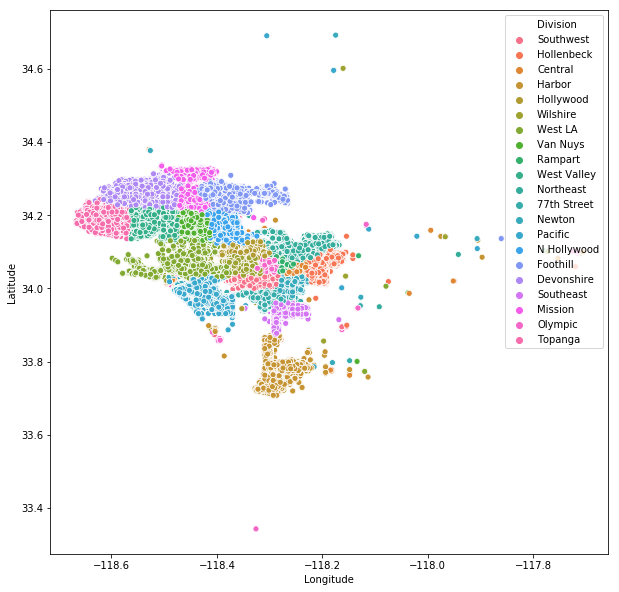

In [23]:
fig, ax = plt.subplots(figsize = (10,10))
ax = sns.scatterplot(x = 'Longitude', y = 'Latitude', hue = "Division", data = z1, legend = 'full')

### The query below is selecting the data using SQL, but then using Python to summarize the findings

In [24]:
# query example used for homework requirement 1
q10 = pd.read_sql_query("SELECT Division \
                         FROM traffic", engine)

# now using python to summarize
q10['Division'].value_counts()

77th Street    37162
Southwest      32953
Wilshire       30340
N Hollywood    29169
Newton         28290
Olympic        28268
West LA        27761
Pacific        27653
Van Nuys       27646
Devonshire     27067
West Valley    26794
Hollywood      25865
Northeast      24732
Mission        24199
Southeast      24141
Topanga        23657
Central        22503
Harbor         20996
Rampart        20838
Hollenbeck     20037
Foothill       19476
Name: Division, dtype: int64

<div class="alert alert-block alert-warning">
    
## Requirements:
Answer the homework questions below.  Add cells as needed. Make sure all cells are run before you save to HTML.
</div>

<div class="alert alert-block alert-warning"> 
    <b> Requirement 1 : (5 points) </b> Using <b>SQL query only</b>, produce output similar to value_counts output that shows Division and the count for each division with the highest count shown first (see output for q10). 
    
   


</div>

In [25]:
r1 = pd.read_sql_query('''SELECT Division, count(*) AS Accidents
                            FROM traffic
                            GROUP BY Division''', engine)
r1

,Division,Accidents
0,77th Street,37162
1,Central,22503
2,Devonshire,27067
3,Foothill,19476
4,Harbor,20996
5,Hollenbeck,20037
6,Hollywood,25865
7,Mission,24199
8,N Hollywood,29169
9,Newton,28290


<div class="alert alert-block alert-warning"> 
<b> Requirement 2 : (5 points) </b>  Show the minimum, maximum and mean values for the Age column.  Do this only using <b>SQL</b>.
    
   


</div>

In [26]:
# could've been done in a single query
# r2 = pd.read_sql_query('''SELECT MIN(Age) AS MinAge, MAX(Age) AS MaxAge, AVG(Age) AS AvgAge
#                           FROM traffic''', engine)
# r2
r2_min = pd.read_sql_query('''SELECT MIN(Age) AS MinAge
                                FROM traffic''', engine)
r2_max = pd.read_sql_query('''SELECT MAX(Age) AS MaxAge
                                FROM traffic''', engine)
r2_mean = pd.read_sql_query('''SELECT AVG(Age) AS MeanAge
                                FROM traffic''', engine)
r2_min
r2_max
r2_mean

,MinAge
0,16


,MaxAge
0,98


,MeanAge
0,40.396983


<div class="alert alert-block alert-warning"> 
<b> Requirement 3 : (5 points) </b>  Find all Divisions with the word 'west' within the division title. Show the number of accidents in these Divisions.  Do this only using <b>SQL</b>. Sort with highest accident count showing on top.
    
   


</div>

In [27]:
r3 = pd.read_sql_query('''SELECT Division, COUNT(*) AS Count
                            FROM traffic
                            WHERE Division LIKE '%west%'
                            GROUP BY Division
                            ORDER BY Count DESC''', engine)
r3

,Division,Count
0,Southwest,32953
1,West LA,27761
2,West Valley,26794


<div class="alert alert-block alert-warning"> 
<b> Requirement 4: (10 points) </b> Let's analyze the accidents for teenagers, 16 to 19, and for the older group over 80.

1. Use SQL to select those in the age ranges described.
2. Based on percentage, how does the younger group differ from the older group by Gender? (Answer with Python)
3. Based on percentage, how does the younger group differ from the older group by Descent? (Answer with Python)
    
   


</div>

In [28]:
#1
r4_teen = pd.read_sql_query('''SELECT *
                                FROM traffic
                                WHERE Age <= 19 AND Age >=16''', engine)
r4_elder = pd.read_sql_query('''SELECT *
                                FROM traffic 
                                WHERE Age > 80''', engine)
#2 by Gender
print("Percentages of Teen Drivers by Gender: ")
print('Male: %', r4_teen['Gender'].value_counts()[0]/r4_teen['Gender'].count()*100)
print('Female: %', r4_teen['Gender'].value_counts()[1]/r4_teen['Gender'].count()*100)
print('Other: %', r4_teen['Gender'].value_counts()[2]/r4_teen['Gender'].count()*100)

print("\nPercentages of Elder Drivers by Gender: ")
print('Male: %', r4_elder['Gender'].value_counts()[0]/r4_elder['Gender'].count()*100)
print('Female: %', r4_elder['Gender'].value_counts()[1]/r4_elder['Gender'].count()*100)
print('Other: %', r4_elder['Gender'].value_counts()[2]/r4_elder['Gender'].count()*100)
#shorter alternative:
#r4_teen['Gender'].value_counts(normalize = True) * 100
#r4_elder['Gender'].value_counts(normalize = True) * 100


#3 by Descent
print("\nPercentages of Teen Drivers by Descent: ")
print('Unknown: %', r4_teen['Descent'].value_counts()[0]/r4_teen['Descent'].count()*100)
print('Hispanic: %', r4_teen['Descent'].value_counts()[1]/r4_teen['Descent'].count()*100)
print('Other: %', r4_teen['Descent'].value_counts()[2]/r4_teen['Descent'].count()*100)
print('White: %', r4_teen['Descent'].value_counts()[3]/r4_teen['Descent'].count()*100)
print('Black: %', r4_teen['Descent'].value_counts()[4]/r4_teen['Descent'].count()*100)
print('Asian: %', r4_teen['Descent'].value_counts()[5]/r4_teen['Descent'].count()*100)

print("\nPercentages of Elder Drivers by Descent: ")
print('Unknown: %', r4_elder['Descent'].value_counts()[0]/r4_elder['Descent'].count()*100)
print('Hispanic: %', r4_elder['Descent'].value_counts()[1]/r4_elder['Descent'].count()*100)
print('Other: %', r4_elder['Descent'].value_counts()[2]/r4_elder['Descent'].count()*100)
print('White: %', r4_elder['Descent'].value_counts()[3]/r4_elder['Descent'].count()*100)
print('Black: %', r4_elder['Descent'].value_counts()[4]/r4_elder['Descent'].count()*100)
print('Asian: %', r4_elder['Descent'].value_counts()[5]/r4_elder['Descent'].count()*100)
#shorter alternative:
#r4_teen['Descent'].value_counts(normalize = True) * 100
#r4_elder['Descent'].value_counts(normalize = True) * 100

Percentages of Teen Drivers by Gender: 
Male: % 40.8961689454447
Female: % 39.880871801814
Other: % 19.222959252741305

Percentages of Elder Drivers by Gender: 
Male: % 58.36940836940837
Female: % 41.41414141414141
Other: % 0.21645021645021645

Percentages of Teen Drivers by Descent: 
Unknown: % 44.32110464329227
Hispanic: % 25.46365236225802
Other: % 13.808041153377554
White: % 8.582645187491538
Black: % 6.43021524299445
Asian: % 1.394341410586165

Percentages of Elder Drivers by Descent: 
Unknown: % 48.17219817219817
Hispanic: % 14.47811447811448
Other: % 14.405964405964406
White: % 12.457912457912458
Black: % 8.826358826358828
Asian: % 1.6594516594516595


<div class="alert alert-block alert-warning"> 
<b> Requirement 5 : (5 points) </b> Let's do an analysis on Hit and Run accidents. We saw that there are two MO codes that represent Hit and Run - 3029 and 3030. 
   
1. Use SQL to query all accidents with codes 3029 or 3030 along with the Division where the accident occurred.   
2. Compare the top 5 Divisions in Requirement 1 that included all accidents to the top 5 Divisions with Hit and Run accidents. How do these differ?
    
   


</div>

In [29]:
#1
r5 = pd.read_sql_query('''SELECT t.DR_Number, a.MO_Codes, t.Division, count(*) AS HitRun
                            FROM MO_accident a, traffic t
                            WHERE t.DR_Number = a.DR_Number AND (a.MO_Codes = 3029 OR a.MO_Codes = 3030)
                            GROUP BY t.Division
                            ORDER BY HitRun DESC''', engine)
r5

,DR_Number,MO_Codes,Division,HitRun
0,191221421,3030,77th Street,16495
1,190319680,3030,Southwest,13407
2,191317613,3030,Newton,13189
3,191516527,3029,N Hollywood,12166
4,190715662,3030,Wilshire,12116
5,192015300,3030,Olympic,11999
6,190601104,3029,Hollywood,11502
7,190913252,3030,Van Nuys,11480
8,191418685,3030,Pacific,11314
9,191818509,3030,Southeast,10932


In [30]:
#2
r1.head(5)
r5.head(5)
# 77th street is has the highest accidents as well as the highest hit and runs; 
# however, none of the other Divisions are similar in these two queries.

,Division,Accidents
0,77th Street,37162
1,Central,22503
2,Devonshire,27067
3,Foothill,19476
4,Harbor,20996


,DR_Number,MO_Codes,Division,HitRun
0,191221421,3030,77th Street,16495
1,190319680,3030,Southwest,13407
2,191317613,3030,Newton,13189
3,191516527,3029,N Hollywood,12166
4,190715662,3030,Wilshire,12116


<div class="alert alert-block alert-warning"> 
<b> Requirement 6 : (5 points) </b>  Use SQL to only select valid latititude and longitudes.  Once you have the data, use matplotlib to plot latitude, longitude and use the Division for hue.
    
- the Latitude edges to Los Angeles appear to be 34.4 and 33.6
- the Longitude edges appear to be -118.7 and -118.1
    
   


</div>

In [31]:
r6 = pd.read_sql_query('''SELECT *
                            FROM traffic
                            WHERE Latitude BETWEEN 33.6 AND 34.4 AND
                            Longitude BETWEEN -118.7 AND -118.1''', engine)
r6

,DR_Number,Date,Division,Reporting_District,Age,Gender,Descent,Year,Month,Day,Hour,imputeAge,Latitude,Longitude
0,190319651,08/24/2019,Southwest,356,22,Male,Hispanic,2019,8,24,4,0,34.0255,-118.3002
1,190319680,08/30/2019,Southwest,355,30,Female,Hispanic,2019,8,30,23,0,34.0256,-118.3089
2,190413769,08/25/2019,Hollenbeck,422,40,Male,Unknown,2019,8,25,5,1,34.0738,-118.2078
3,190127578,11/20/2019,Central,128,21,Male,Hispanic,2019,11,20,3,0,34.0492,-118.2391
4,190319695,08/30/2019,Southwest,374,49,Male,Black,2019,8,30,21,0,34.0108,-118.3182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549494,211517219,11/09/2021,N Hollywood,1548,38,Male,White,2021,11,9,9,0,34.1681,-118.3790
549495,211613087,11/03/2021,Foothill,1665,29,Female,Hispanic,2021,11,3,7,0,34.2495,-118.3707
549496,211819495,10/31/2021,Southeast,1891,33,Male,Black,2021,10,31,23,0,33.8773,-118.2867
549497,211613266,11/08/2021,Foothill,1676,23,Male,White,2021,11,8,21,0,34.2250,-118.3618


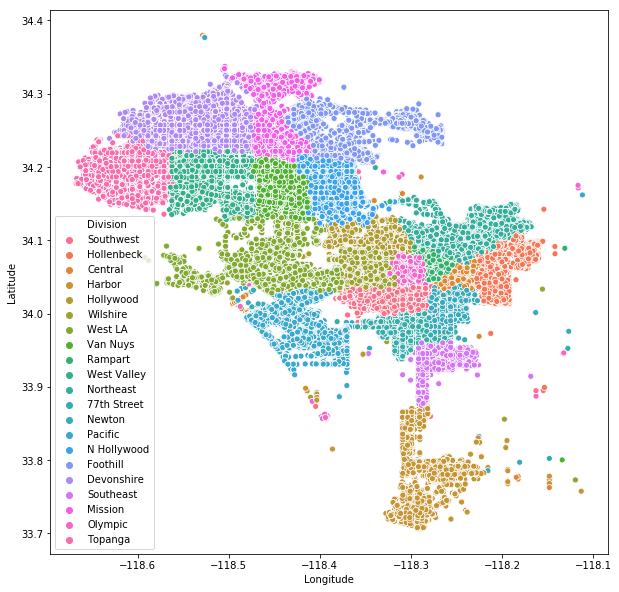

In [32]:
fig, r6x = plt.subplots(figsize = (10,10))
r6x = sns.scatterplot(x = 'Longitude', y = 'Latitude', hue = "Division", data = r6, legend = 'full')

<div class="alert alert-block alert-warning"> 
<b> Requirement 7: (5 points) </b>  Are the imputed records the same as the non-imputed records?  Select imputeAge, Gender and Descent.

- Compare Gender for imputeAge (imputed vs non-imputed records). Would you consider the imputed records to be similar to non-imputed in regards to Gender?
- Compare Descent for imputeAge (imputed vs non-imputed records). Would you consider the imputed records to be similar to non-imputed in regards to Descent?
    
   


</div>

In [33]:
r7_gender = pd.read_sql_query('''SELECT imputeAge, Gender, count(*) AS Count
                                    FROM traffic
                                    GROUP BY imputeAge, Gender''', engine)
r7_descent = pd.read_sql_query('''SELECT imputeAge, Descent, count(*) AS Count
                                    FROM traffic
                                    GROUP BY imputeAge, Descent''', engine)
r7_gender
r7_descent

,imputeAge,Gender,Count
0,0,Female,192889
1,0,Male,276568
2,0,Other,3594
3,1,Female,16992
4,1,Male,47928
5,1,Other,11576


,imputeAge,Descent,Count
0,0,Asian,26920
1,0,Black,70380
2,0,Hispanic,188439
3,0,Other,59910
4,0,Unknown,11554
5,0,White,115848
6,1,Asian,1236
7,1,Black,4338
8,1,Hispanic,21445
9,1,Other,18797


In [34]:
#cross tab works better!!
#or value counts normalized like above
print("Percentage of Female (non-imputed): ", 
      r7_gender['Count'][0]/(r7_gender['Count'][0] + 
        r7_gender['Count'][1] + r7_gender['Count'][2]) * 100)
print("Percentage of Female (imputed): ", 
      r7_gender['Count'][3]/(r7_gender['Count'][3] + 
        r7_gender['Count'][4] + r7_gender['Count'][5]) * 100)

print("\nPercentage of Male (non-imputed): ", 
      r7_gender['Count'][0]/(r7_gender['Count'][1] + 
        r7_gender['Count'][1] + r7_gender['Count'][2]) * 100)
print("Percentage of Male (non-imputed): ", 
      r7_gender['Count'][4]/(r7_gender['Count'][3] + 
        r7_gender['Count'][4] + r7_gender['Count'][5]) * 100)

print("\nPercentage of Other (non-imputed): ", 
      r7_gender['Count'][0]/(r7_gender['Count'][2] + 
        r7_gender['Count'][1] + r7_gender['Count'][2]) * 100)
print("Percentage of Other (non-imputed): ", 
      r7_gender['Count'][5]/(r7_gender['Count'][3] + 
        r7_gender['Count'][4] + r7_gender['Count'][5]) * 100)

Percentage of Female (non-imputed):  40.77551891867896
Percentage of Female (imputed):  22.21292616607404

Percentage of Male (non-imputed):  34.64677671402655
Percentage of Male (non-imputed):  62.654256431708845

Percentage of Other (non-imputed):  67.97706480215396
Percentage of Other (non-imputed):  15.132817402217109


In [35]:
print("Percentage of Asian (non-imputed): ", 
      r7_descent['Count'][0]/(r7_descent['Count'][0] + 
        r7_descent['Count'][1] + r7_descent['Count'][2] + 
        r7_descent['Count'][3] + r7_descent['Count'][4] + 
        r7_descent['Count'][5]) * 100)
print("Percentage of Asian (imputed): ", 
      r7_descent['Count'][6]/(r7_descent['Count'][6] + 
        r7_descent['Count'][7] + r7_descent['Count'][8] + 
        r7_descent['Count'][9] + r7_descent['Count'][10] + 
        r7_descent['Count'][11]) * 100)

print("\nPercentage of Black (non-imputed): ", 
      r7_descent['Count'][1]/(r7_descent['Count'][0] + 
        r7_descent['Count'][1] + r7_descent['Count'][2] + 
        r7_descent['Count'][3] + r7_descent['Count'][4] + 
        r7_descent['Count'][5]) * 100)
print("Percentage of Black (imputed): ", 
      r7_descent['Count'][7]/(r7_descent['Count'][6] + 
        r7_descent['Count'][7] + r7_descent['Count'][8] + 
        r7_descent['Count'][9] + r7_descent['Count'][10] + 
        r7_descent['Count'][11]) * 100)

print("\nPercentage of Hispanic (non-imputed): ", 
      r7_descent['Count'][2]/(r7_descent['Count'][0] + 
        r7_descent['Count'][1] + r7_descent['Count'][2] + 
        r7_descent['Count'][3] + r7_descent['Count'][4] + 
        r7_descent['Count'][5]) * 100)
print("Percentage of Hispanic (imputed): ", 
      r7_descent['Count'][8]/(r7_descent['Count'][6] + 
        r7_descent['Count'][7] + r7_descent['Count'][8] + 
        r7_descent['Count'][9] + r7_descent['Count'][10] + 
        r7_descent['Count'][11]) * 100)

print("\nPercentage of Other (non-imputed): ", 
      r7_descent['Count'][3]/(r7_descent['Count'][0] + 
        r7_descent['Count'][1] + r7_descent['Count'][2] + 
        r7_descent['Count'][3] + r7_descent['Count'][4] + 
        r7_descent['Count'][5]) * 100)
print("Percentage of Other (imputed): ", 
      r7_descent['Count'][9]/(r7_descent['Count'][6] + 
        r7_descent['Count'][7] + r7_descent['Count'][8] + 
        r7_descent['Count'][9] + r7_descent['Count'][10] + 
        r7_descent['Count'][11]) * 100)

print("\nPercentage of Unknown (non-imputed): ", 
      r7_descent['Count'][4]/(r7_descent['Count'][0] + 
        r7_descent['Count'][1] + r7_descent['Count'][2] + 
        r7_descent['Count'][3] + r7_descent['Count'][4] + 
        r7_descent['Count'][5]) * 100)
print("Percentage of Unknown (imputed): ", 
      r7_descent['Count'][10]/(r7_descent['Count'][6] + 
        r7_descent['Count'][7] + r7_descent['Count'][8] + 
        r7_descent['Count'][9] + r7_descent['Count'][10] + 
        r7_descent['Count'][11]) * 100)

print("\nPercentage of White (non-imputed): ", 
      r7_descent['Count'][5]/(r7_descent['Count'][0] + 
        r7_descent['Count'][1] + r7_descent['Count'][2] + 
        r7_descent['Count'][3] + r7_descent['Count'][4] + 
        r7_descent['Count'][5]) * 100)
print("Percentage of White (imputed): ", 
      r7_descent['Count'][11]/(r7_descent['Count'][6] + 
        r7_descent['Count'][7] + r7_descent['Count'][8] + 
        r7_descent['Count'][9] + r7_descent['Count'][10] + 
        r7_descent['Count'][11]) * 100)

Percentage of Asian (non-imputed):  5.690718336923503
Percentage of Asian (imputed):  1.615770759255386

Percentage of Black (non-imputed):  14.877888430634329
Percentage of Black (imputed):  5.670884752143903

Percentage of Hispanic (non-imputed):  39.834816964767015
Percentage of Hispanic (imputed):  28.03414557623928

Percentage of Other (non-imputed):  12.664596417722402
Percentage of Other (imputed):  24.572526668061077

Percentage of Unknown (non-imputed):  2.442442781010927
Percentage of Unknown (imputed):  22.083507634386113

Percentage of White (non-imputed):  24.48953706894183
Percentage of White (imputed):  18.023164609914243


In [36]:
# In regards to gender, the imputed records have a higher rate of Other
# and a lower rate of Female compared to non-imputed records

# In regards to descent, the imputed records have a higher rate of Other
# and Unknown, with a lower rate of all other descents compared to 
# non-imputed records